In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
class_age=df.groupby("Pclass")["Age"].mean()
class_age=pd.DataFrame(class_age)
class_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [0]:
a=list(class_age['Age'])
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return a[0]
        elif Pclass==2:
            return a[1]
        else :
            return a[2]
    else:
        return Age

In [0]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

In [6]:
df.drop(['PassengerId',"Name","Ticket","Fare","Cabin"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [0]:
pclass=pd.get_dummies(df["Pclass"],drop_first=True)
sex=pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [8]:
df=pd.concat([df,pclass,sex,embarked],axis=1)
df.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [0]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size=0.30,random_state=111)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


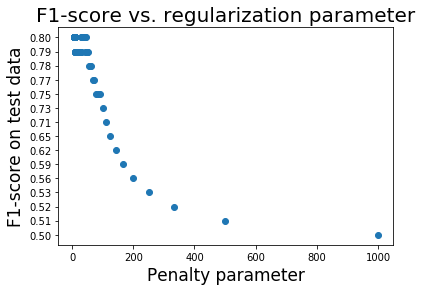

In [16]:
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
c=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(x_train,y_train)
        predictions[i] = logmodel[i].predict(x_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i
        c[i]=i/1000
plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()


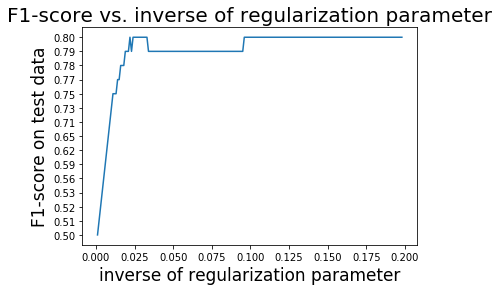

In [17]:
plt.plot(c[1:len(c)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. inverse of regularization parameter",fontsize=20)
plt.xlabel("inverse of regularization parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

In [56]:
grid={"C": np.linspace(0.100,0.175),"penalty" : ["l1" ,"l2"] ,"tol" : [1e-4] ,"max_iter" : [100],"n_jobs" : [6]}
logreg=LogisticRegression()
logreg_Cv=GridSearchCV(logreg,grid,cv=10)
logreg_Cv.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1       , 0.10153061, 0....
       0.14591837, 0.14744898, 0.14897959, 0.1505102 , 0.15204082,
       0.15357143, 0.15510204, 0.15663265, 0.15816327, 0.15969388,
       0.16122449, 0.1627551 , 0.16428571, 0.16581633, 0.16734694,
       0.16887755, 0.17040816, 0.17193878, 0.17346939, 0.175     ]),
              

In [57]:
print(logreg_Cv.best_params_)
print(logreg_Cv.best_score_)
print(logreg_Cv.score(x_test,y_test))
prediction=logreg_Cv.predict(x_test)
print(classification_report(y_test,prediction))

{'C': 0.11224489795918367, 'max_iter': 100, 'n_jobs': 6, 'penalty': 'l2', 'tol': 0.0001}
0.8009984639016897
0.7985074626865671
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       171
           1       0.75      0.66      0.70        97

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268

